### ĐỒ ÁN MẠNG XÃ HỘI


Import thư viện

In [2]:
# Network library
import networkx as nx
# Data libraries
import pandas as pd
import numpy as np
# Plotting libraries
import plotly.graph_objects as go
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
from pyvis import network as net

Load dữ liệu Wiki-Vote lên Project 

In [3]:
wiki_vote = pd.read_csv('Wiki-Vote.csv');
wiki_vote

,FromNodeId,ToNodeId
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478
...,...,...
103684,8272,4940
103685,8273,4940
103686,8150,8275
103687,8150,8276


#### MÔ TẢ DỮ LIỆU
Wikipedia là 1 cuốn bách khoa toàn thư miễn phí được viết bởi các tình nguyện viên trên khắp thế giới. Một phần của Wikipedia là quản trị viên, có quyền truy cập vào các tính năng bảo mật. Và để 1 người dùng có thể trở thành quản trị viên, cộng đồng Wikipedia sẽ mở ra một cuộc bỏ phiếu để xem người dùng có thể trở thành quản trị viên hay không. Và tập dữ liệu Wiki-Vote chứa thông tin bao gồm 2794 cuộc bầu cử, 103663 tổng số phiếu và 7066 người dùng tham gia cuộc bầu cử(người dùng bỏ phiếu hoặc được bỏ phiếu).
Dữ liệu bỏ phiếu được thu thập từ khi bắt đầu Wikipedia cho đến tháng 1 năm 2008

In [4]:
#Dữ liệu là đồ thị có hướng
wiki_vote.describe()

,FromNodeId,ToNodeId
count,103689.000000,103689.000000
mean,2897.534792,3580.347018
std,2114.756932,2204.045658
min,3.000000,3.000000
25%,1102.000000,1746.000000
50%,2585.000000,3260.000000
75%,4442.000000,5301.000000
max,8274.000000,8297.000000


In [5]:
#Kiểm tra số nodes và edges của đồ thị có hướng
wiki_edge_node_list = nx.from_pandas_edgelist(wiki_vote, 'FromNodeId', 'ToNodeId',create_using=nx.DiGraph())
n_nodes=wiki_edge_node_list.number_of_nodes()
n_edges=wiki_edge_node_list.number_of_edges()
print(wiki_edge_node_list)

DiGraph with 7115 nodes and 103689 edges


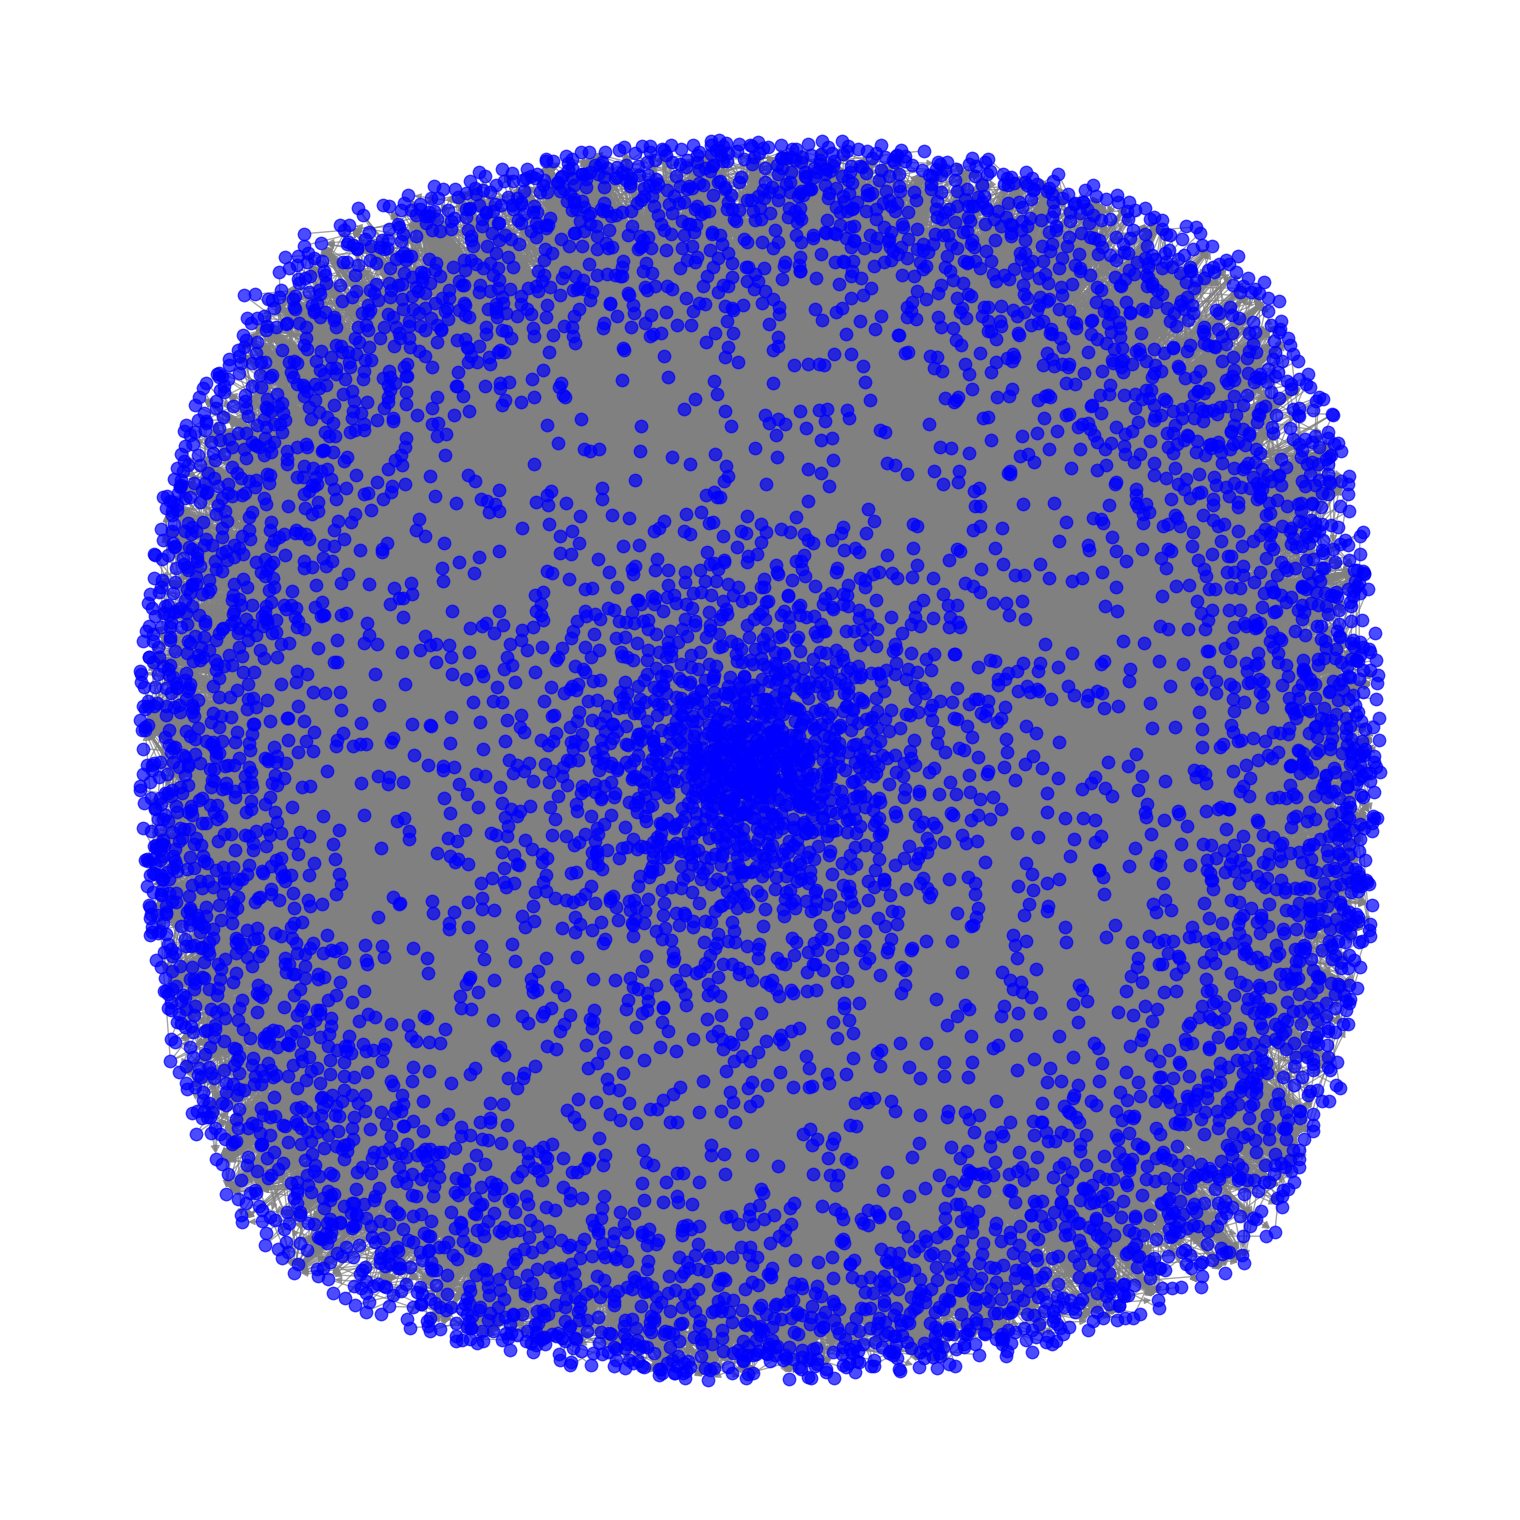

In [8]:
pos=nx.spring_layout(wiki_edge_node_list,k=0.15,iterations=20)
plt.figure(figsize=(15, 15))
nx.draw(wiki_edge_node_list, pos, node_size=80, node_color='blue',alpha=0.7,edge_color='0.5',with_labels=False,width=True)
plt.show()

In [9]:
plt.savefig('position_nodes')

<Figure size 640x480 with 0 Axes>

Betweeness Centrality

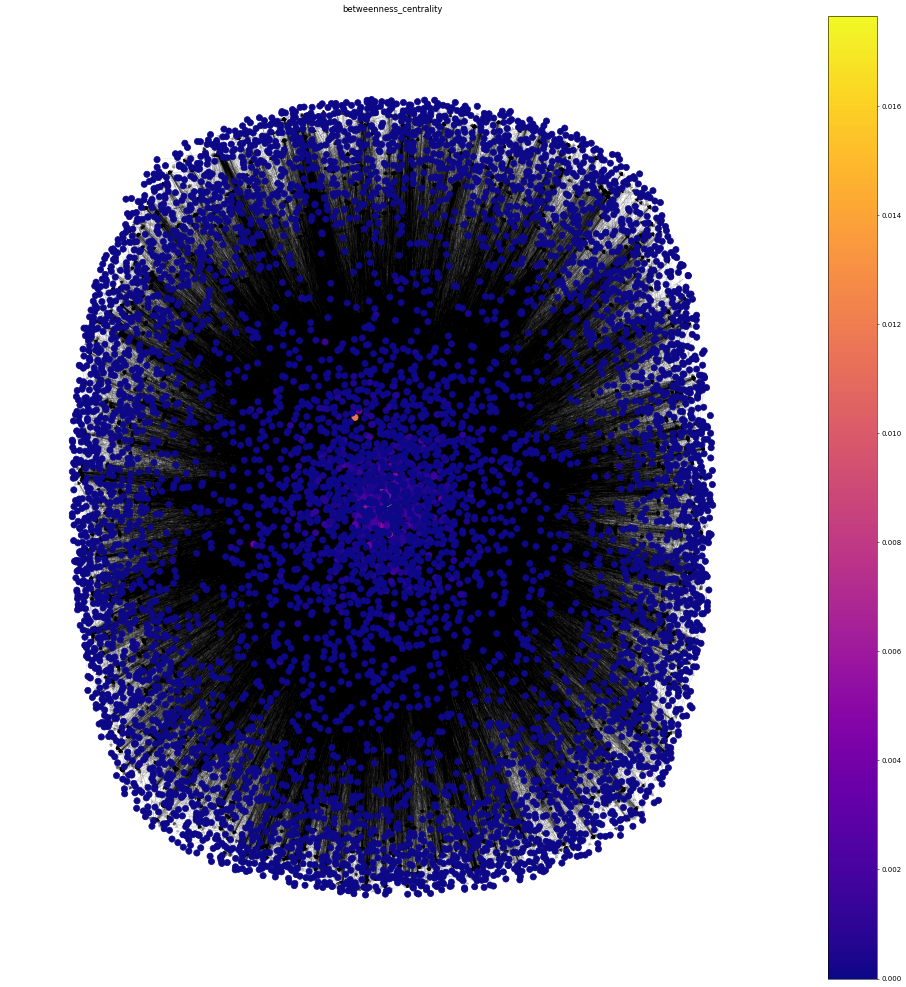

In [10]:
fig, ax = plt.subplots(1,1, figsize=(25,25), dpi=50)
nodes = nx.draw_networkx_nodes(wiki_edge_node_list, pos, node_size=80, cmap=plt.cm.plasma, 
                               node_color=list(nx.betweenness_centrality(wiki_edge_node_list).values()),
                               nodelist=nx.betweenness_centrality(wiki_edge_node_list).keys())
edges = nx.draw_networkx_edges(wiki_edge_node_list, pos,alpha=0.2,width=0.5)
plt.title('betweenness_centrality') 
plt.colorbar(nodes) 
plt.axis('off') 
plt.show() 

In [11]:
stats=pd.DataFrame(wiki_edge_node_list.nodes())
stats.columns=['Node']